## Objective
Save recording in format for running RT-Sort (including running DL model) using spikeinterface

In [1]:
from pathlib import Path

import numpy as np

%env HDF5_PLUGIN_PATH /home/mea/SpikeSorting/spikeinterface
from spikeinterface.extractors import MaxwellRecordingExtractor, NwbRecordingExtractor
from spikeinterface.toolkit.preprocessing import scale, bandpass_filter

env: HDF5_PLUGIN_PATH=/home/mea/SpikeSorting/spikeinterface


In [2]:
REC_PATH = "/data/MEAprojects/dandi/000034/sub-MEAREC-250neuron-Neuropixels/sub-MEAREC-250neuron-Neuropixels_ecephys.nwb"
recording = NwbRecordingExtractor(REC_PATH)

SAVE_ROOT = Path("/data/MEAprojects/dandi/000034/sub-MEAREC-250neuron-Neuropixels")
SAVE_ROOT.mkdir(exist_ok=True)


/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])


In [ ]:
# # Save original unscaled traces
traces = recording.get_traces(return_scaled=False).T  # (num_chans, num_samples)
np.save(SAVE_ROOT / "traces_og.npy", traces)
del traces

In [19]:
# # Scaled and filtered traces (needed for older versions of RT-Sort)
# # recording_filt = scale(recording, recording.get_channel_gains().astype("float16"), recording.get_channel_offsets().astype("float16"), dtype="float16")
# recording_filt = scale(recording, np.array([1.0]*recording.get_num_channels(), dtype="float16"), np.array([0.0]*recording.get_num_channels(), dtype="float16"), dtype="float16")
# recording_filt = bandpass_filter(recording_filt, 300, 3000, dtype="float16")
# traces = recording_filt.get_traces(return_scaled=False)
# np.save(SAVE_ROOT / "traces_filt.npy", traces)

: 

## Investigate traces 
For reasons such as: are they scaled to uV?

In [13]:
traces = np.load(SAVE_ROOT / "traces.npy", mmap_mode="r")

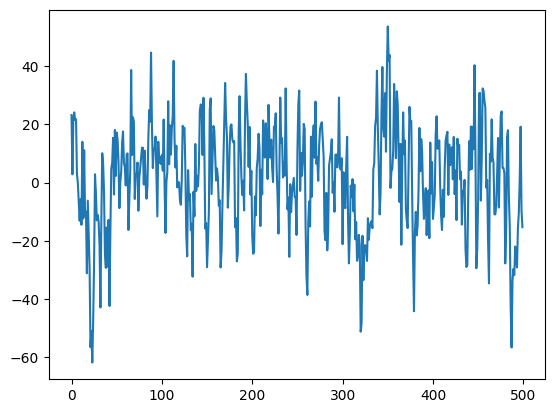

In [17]:
import matplotlib.pyplot as plt
plt.plot(traces[5, 1000:1500])
plt.show()